# <center> <font style="color:rgb(100,109,254)">Canny Edge Detector</font>  <center>


##  <font style="color:rgb(134,19,348)"> What are Edges in Images  </font>

Edge can be defined as set of continuous pixel positions where an abrupt change of intensity (gray or color) values occur. Or alternatively rapid changes in gradient occur.

Another way to define edges is edges are those where the gradient in one direction is high, while the gradient in its orthogonal direction is low.

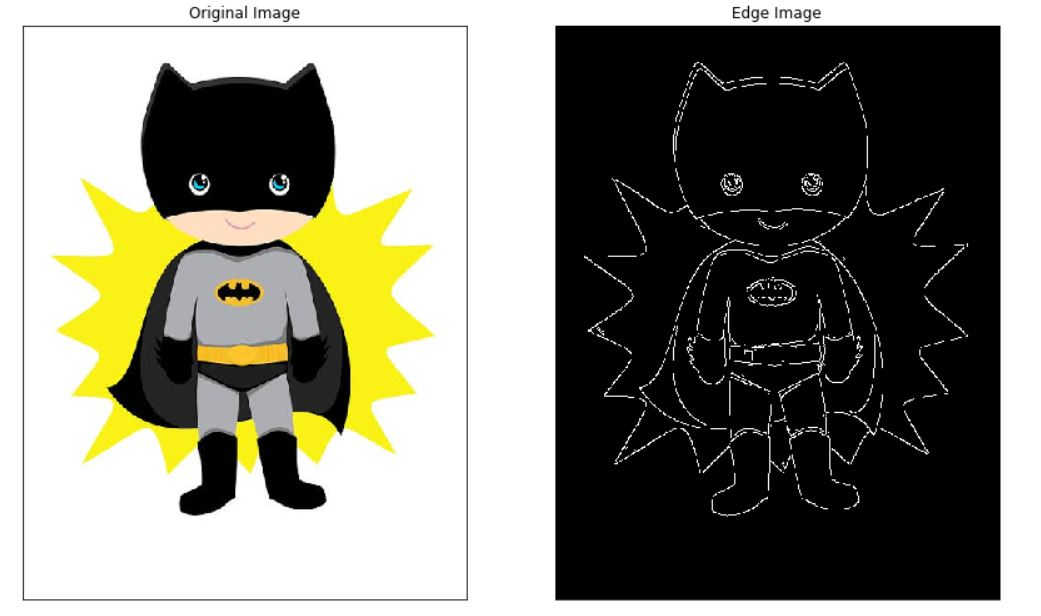

###    <font style="color:rgb(134,19,348)"> A typical Edge Detector:  </font>

We have already seen what a typical edge detector like Sobel do, So this how generally an edge detector works, first it makes a gaussian filter go over the image to get rid of the noise and smooth out the image. Then we find gradients, its magnitude and direction and with that we can threshold to get the edges. Well a Canny edge detector has a few more extra steps


##   <font style="color:rgb(134,19,348)"> Canny Edge Detector:  </font>
So in Canny edge detector these are the general Steps:

### <font style="color:rgb(134,19,348)">Step 1:   Image Smoothing:   </font>
First we convert the image to grayscale and then we apply a 5x5 Gaussian filter to get rid of the noise.
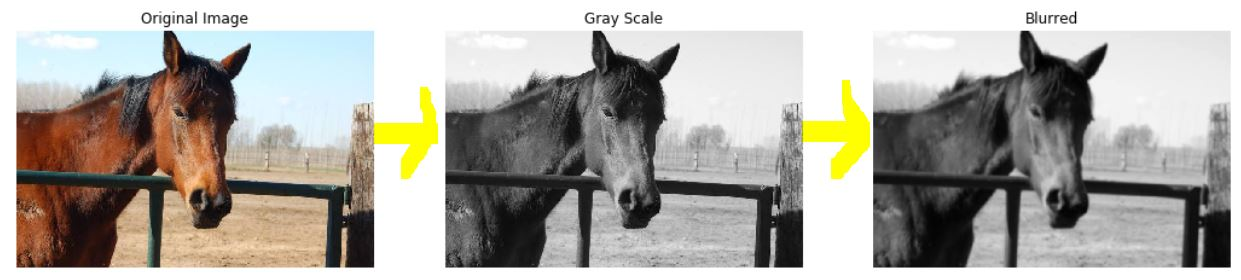
    
###   <font style="color:rgb(134,19,348)"> Step 2: Find the x,y Gradients:  </font>
Now we find the x and y gradients using the sobel operation.

###  <font style="color:rgb(134,19,348)"> Step 3: Find Magnitude & Direction of Gradient:   </font>
After finding the gradients we can easily find the magnitude and direction of the gradients using the below formulas.

$$
G = \sqrt {G^2_x + G^2_y}
$$

Where $G_x$& $G_y$ are the magnitudes in x and y directions

Direction:

$$
\theta = \arctan \frac{G_y}{G_x}
$$


###    <font style="color:rgb(134,19,348)"> Step 4: Non Maximum Suppression  </font>
In most of the real world scenarios the edges are not sharp and clear, so what ends up happening is that the algorithm will detect multiple edges for a single edge because the surrounding area around the edges also have high gradients.


So what you do is that you perform non-maximum suppression here, now Non-max suppression is a very common step in many object detection pipelines, what this does is that it just filters out unnecessary and weak detections, here's an example image where Non-max Suppression is applied in an object detection pipeline.


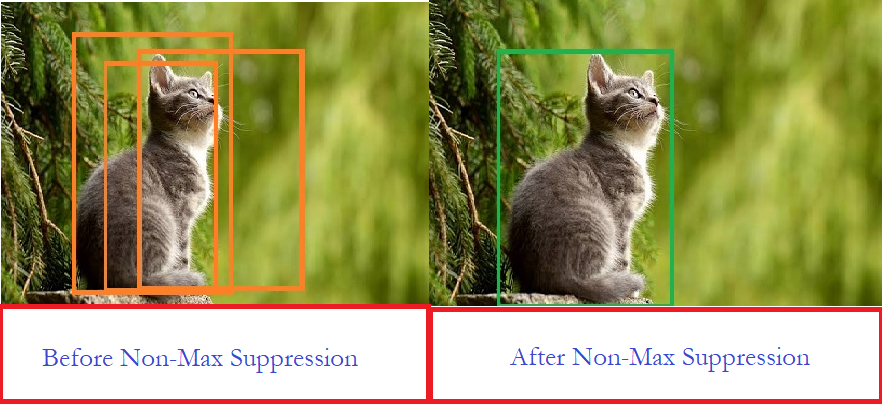


**Now Non-max suppression is also applied in Canny edge detection and it gives out sharp edges and removes weak edge detections.**


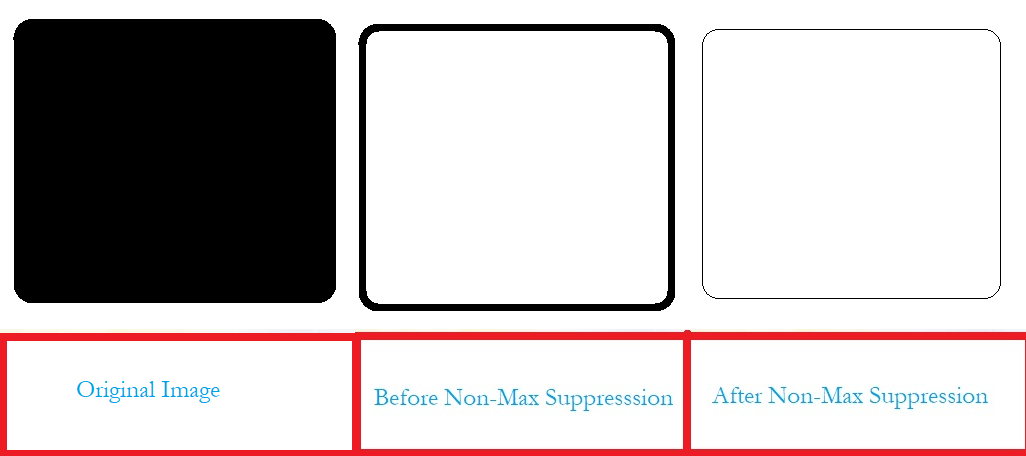

Now this is achieved by checking every pixel and its neighborhood in the direction of its gradient if it is a local maximum in its neighborhood only then its classified as a real edge.

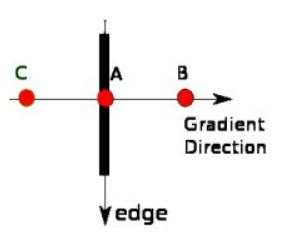



###   <font style="color:rgb(134,19,348)"> Step 5: Hysteresis Thresholding:  </font>
Now the above thresholding technique to get the edges is fine and all but in real world you don't get all the edges with that, the images are messy, all the edges are not clear. A single global threshold for the whole image cannot give you all the edges, since edges may be stronger at some points but not the other.

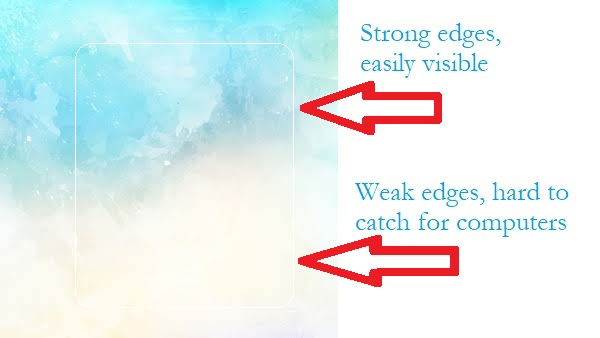

As you can see in the example above, the edges are lighter in the bottom, as a human you can easily draw the full boundary of the edges but if you set a single threshold to filter the image for the computer then it would be hard for computer to automatically adjust the threshold for lighter edges.

Now you could drop the threshold to also detect the lighter edges, but this would also give rise to a lot of noise and classify them as edges.

So what canny edge detection does to tackle this problem is that it uses two different thresholds. One threshold is upper threshold, anything above this threshold is classified as a sure edge. Now there's a 2nd threshold called lower threshold, anything below this is classified as a sure Non-edge. Now what about pixels that are above the lower threshold and below threshold ?, well these can also be classified as edges if and only these pixels are connected to pixels above the high threshold. Here's an illustration of what I mean.

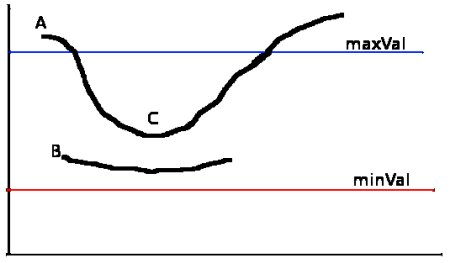



Now, see how `C` qualify as an edge because its connected to `A` (a sure edge) even though `C` is below the upper thresh. On the other side `B` is disqualified as an edge because its not connected to any edge pixel. Now this smart technique of using two thresholds instead of one is called Hysteresis thresholding.

Now this completes our Canny edge detection edge Pipeline.

In [2]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

##  <font style="color:rgb(134,19,348)"> Canny Edge Detection in Opencv  </font>

[```edges = cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)


**Parameters**
- **`image`**: This is the source image.
- **`edges`**	output edge map; single channels 8-bit image, which has the same size as image .
- **`threshold1`**	first threshold for the hysteresis procedure.
- **`threshold2`**	second threshold for the hysteresis procedure.
- **`apertureSize`** aperture size for the Sobel operator.
- **`L2gradient`**	a flag, indicating whether a more accurate L2 norm = √(dI/dx)2+(dI/dy)2 should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default L1 norm =|dI/dx|+|dI/dy| is enough ( L2gradient=false ).

**Note**: Setting L2 Gradient to true, may possibliy give you somewhat high accuracy at the cost of speed.


See below, we perform edge detection on image, and then we perform Canny detection on the blurred image.

<Figure size 1008x1008 with 0 Axes>

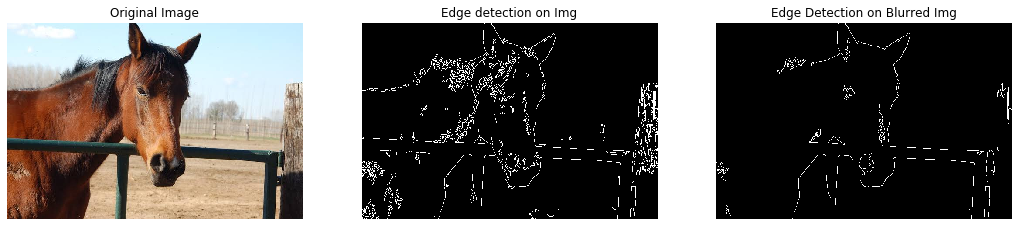

In [3]:
img = cv2.imread('media/M3/horse.jpg',1)
blurred_img = cv2.GaussianBlur(img,(3,3),0)

plt.figure(figsize=[14,14])

lower_thresh= 100
upper_thresh= 400

edges = cv2.Canny(img,lower_thresh, upper_thresh)
edges_on_blurred = cv2.Canny(blurred_img,lower_thresh,upper_thresh)

plt.figure(figsize=[18,18])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(132);plt.imshow(edges,cmap='gray');plt.title("Edge detection on Img");plt.axis('off');
plt.subplot(133);plt.imshow(edges_on_blurred, cmap='gray');plt.title("Edge Detection on Blurred Img");plt.axis('off');

##  <font style="color:rgb(134,19,348)"> Tunning Canny Parameters:  </font>

With below script you can either tune to get the ideal params for some image or the web cam feed.

In [5]:
canny_on_video = True   # if true the tuning is done on the video else its done on the below image
path_of_image = 'media/M3/horse.jpg'

def nothing(x):
    pass

apertures = [3,5,7]
cv2.namedWindow('Trackbars', cv2.WINDOW_NORMAL)

cv2.createTrackbar("lower_thresh", "Trackbars", 100, 600, nothing)
cv2.createTrackbar("upper_thresh", "Trackbars", 400, 800, nothing)
cv2.createTrackbar("aperture_index", "Trackbars", 0, 2, nothing)
cv2.createTrackbar("Gaussian_Blurring", "Trackbars", 0, 12, nothing)

if canny_on_video :
    cap = cv2.VideoCapture(0)  

while True: 
    if canny_on_video:
        ret ,frame = cap.read()  
        if not ret:
            break
    else:    
        frame = cv2.imread(path_of_image,1)
        
    frame = cv2.flip( frame, 1 ) 

    lower_thresh =cv2.getTrackbarPos("lower_thresh", "Trackbars")
    upper_thresh = cv2.getTrackbarPos("upper_thresh", "Trackbars")
    aperture_index = cv2.getTrackbarPos("aperture_index", "Trackbars")
    Gaussian_Blurring = cv2.getTrackbarPos("Gaussian_Blurring", "Trackbars")

    # we are making sure that the gaussian kernel is an odd number
    if Gaussian_Blurring > 0:
        frame = cv2.GaussianBlur(frame, (2 * Gaussian_Blurring + 1, 2 * Gaussian_Blurring + 1), 0);
        
    apertureSize = apertures[aperture_index]                
    edges = cv2.Canny(frame, lower_thresh, upper_thresh, apertureSize= apertureSize)   
    cv2.imshow("Trackbars", edges)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
    if key == ord('s'):
        print('lower {}, upper {}, apertureSize {}, blur {}'.format(lower_thresh,upper_thresh,apertureSize,Gaussian_Blurring))
        break
       
    if canny_on_video:
    cap.release()    
cv2.destroyAllWindows()